In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
#list of all disorders from the ldsc analysis
disorders = ['ADHD','ANOREXIA', 'ANXIETY','RA','ASD','AUD','BILIARYCHIRROSIS','BPD','CHRONICPAIN','CUD','ENDOMETRIOSIS','EPILEPSY','FATIGUE','FIBROMYALGIA','GDM','GH','GOUT','HOARDING','IBD','IBS','SLE','MDD','MIGRAINE','MS','MYASTHENIA','OCD','OD','PANICDISORDER','PARKINSONS','PCOS','PREECLAMPSIA','PRETERMBIRTH','PTSD','SJOGRENS','SZC','THYROIDDISEASE','TS']

In [4]:
#make list of files to read in
ex_table_files = glob.glob('*_extracted_table.txt')
# Sort the list of files based on the numeric part in the filenames
ex_table_files = sorted(ex_table_files, key=lambda x: int(x.split('_')[0]), reverse=True)

In [5]:
df_list = []

#read in files to dataframes 
for file in ex_table_files:
    df = pd.read_csv(file, delim_whitespace=True
                     , skiprows=1) 
    #select relevant columns
    df = df[['p1','p2','rg','se','z','p']]
    #remove last two rows (log of the results)
    df = df.iloc[:-2]
    df_list.append(df)

In [20]:
#A function to create a matrix with all the pairwise correlations
def make_correlation_matrix(column, df_list):
    n = len(df_list) +1
    array = np.zeros((n, n))

    for i, df in enumerate(df_list):
        val = df[column].values

        if len(val) > 0: 
            # Extract values of 'rg' column to a list
            rg_values = list(val)

            # Fill the matrix starting from below the diagonal
            for j in range(i + 1, n):
                array[j, i] = rg_values.pop(0)

    # Fill the diagonal with 1
    if column == 'rg':            
        np.fill_diagonal(array, 1)
    else:
        np.fill_diagonal(array, 0.00005)

    # Convert the filled cells to numeric
    array = array.astype(float).round(2)
    
    # Set values outside [-1, 1] to NaN 
    array[(array > 1) | (array < -1)] = np.nan
    
    # Create a DataFrame with disorders as column and index names
    return pd.DataFrame(array, index=disorders, columns=disorders), array


In [21]:
gen_corr_df, corr_matrix = make_correlation_matrix('rg', df_list)
# Set NaN values to  0
gen_corr_df.fillna(0, inplace=True)

In [23]:
# Make full matrix from the triangular correlation matrix
full_matrix = np.tril(corr_matrix) + np.tril(corr_matrix, -1).T
full_df = pd.DataFrame(full_matrix, index=disorders, columns=disorders)


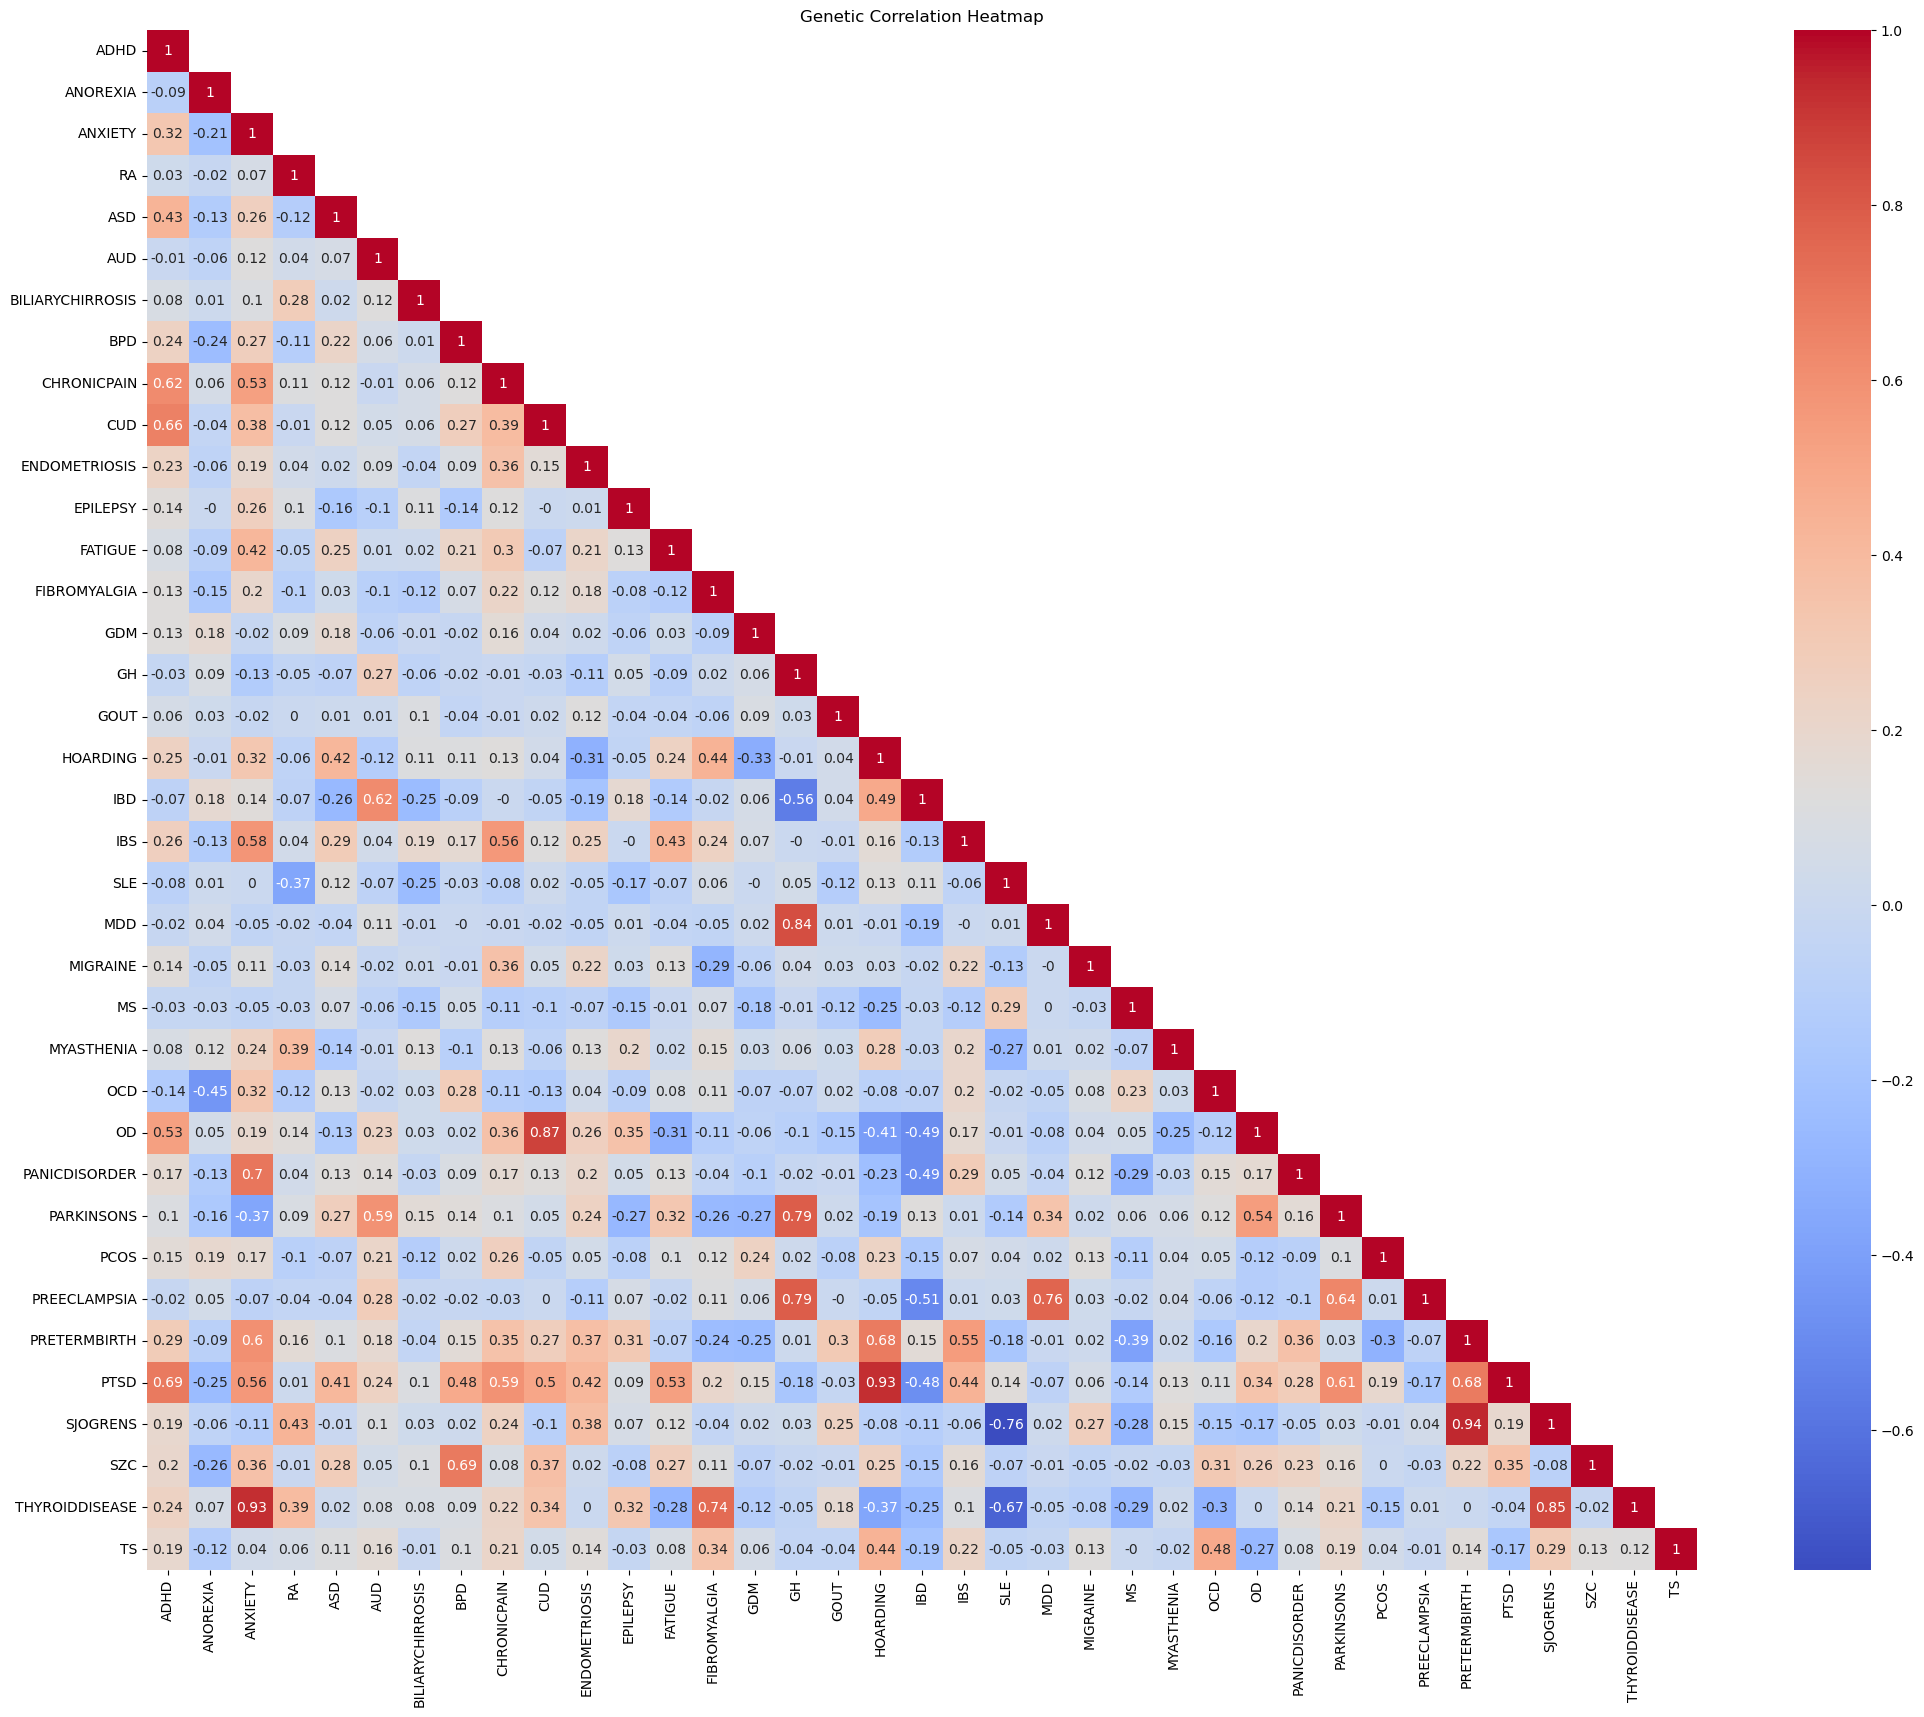

In [24]:
# Create a mask for the upper triangular part over the diagonal
mask = np.triu(np.ones_like(gen_corr_df), k=1)

# Plot the heatmap
plt.figure(figsize=(25,20))
heatmap= sns.heatmap(gen_corr_df, annot=True, cmap='coolwarm',mask=mask)

plt.title('Genetic Correlation Heatmap')
plt.show()



<Figure size 2000x2000 with 0 Axes>

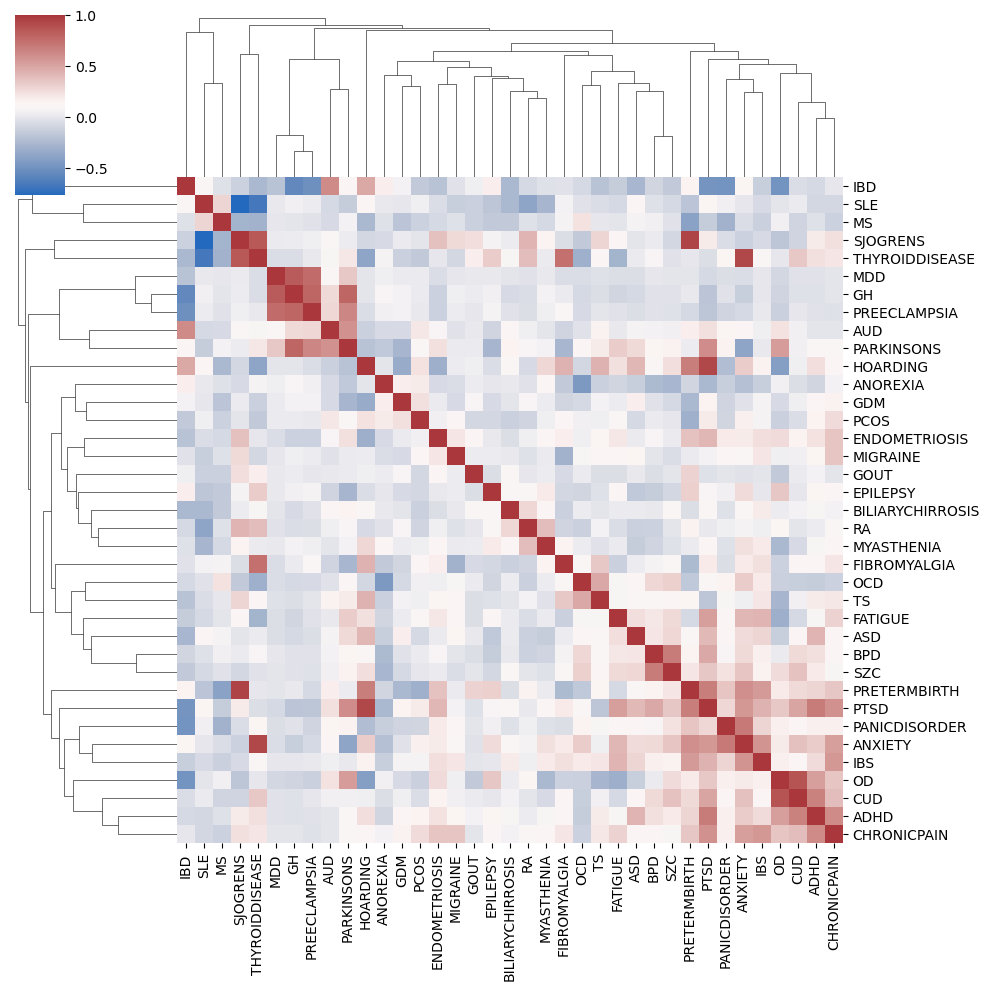

In [25]:
#plot clustermap
plt.figure(figsize=(20,20))
sns.clustermap(full_df,cmap='vlag', method='average', metric='euclidean')
plt.show()